### Initial Exploration

In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('processed.csv')

In [40]:
df.head()

,Time,TransactionTime,HourOfDay,MinuteOfHour,V1,V2,V3,V4,V5,V6,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,00:00:00,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,00:00:00,0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,00:00:01,0,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,00:00:01,0,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,00:00:02,0,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [41]:
#difference between fraud and non-fraud entries 
fraud = df[df['Class'] ==1]
print(len(fraud['Class'])/ len(df['Class'])*100, '% of entries are fraudulent')
nofraud = df[df['Class'] ==0]
print(len(nofraud['Class'])/ len(df['Class'])*100, '% of entries are non-fraudulent')

0.18155116389328954 % of entries are fraudulent
99.81844883610671 % of entries are non-fraudulent


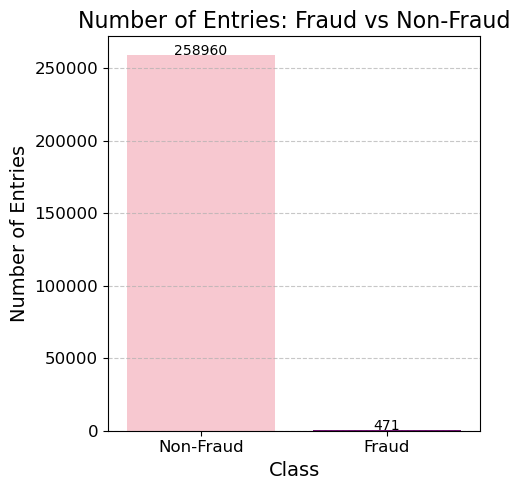

In [42]:
class_counts = df['Class'].value_counts().sort_index()
plt.figure(figsize=(5, 5))

# Use the hue parameter to specify the color
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, dodge=False,
            palette=['pink', 'purple'], legend=False)

plt.title('Number of Entries: Fraud vs Non-Fraud', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Entries', fontsize=14)
plt.xticks(ticks=class_counts.index, labels=['Non-Fraud', 'Fraud'], fontsize=12)
plt.yticks(fontsize=12)

# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding counts on top of bars
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()



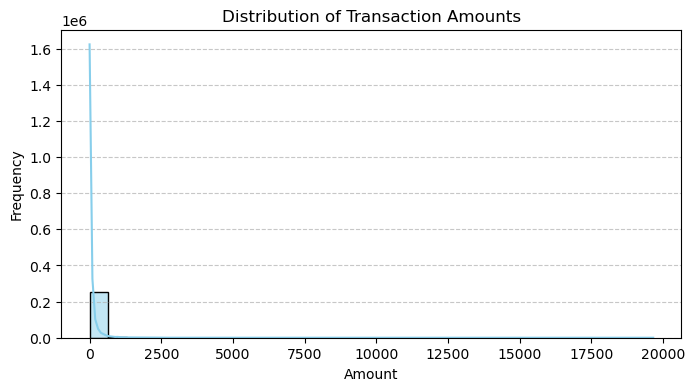

In [43]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


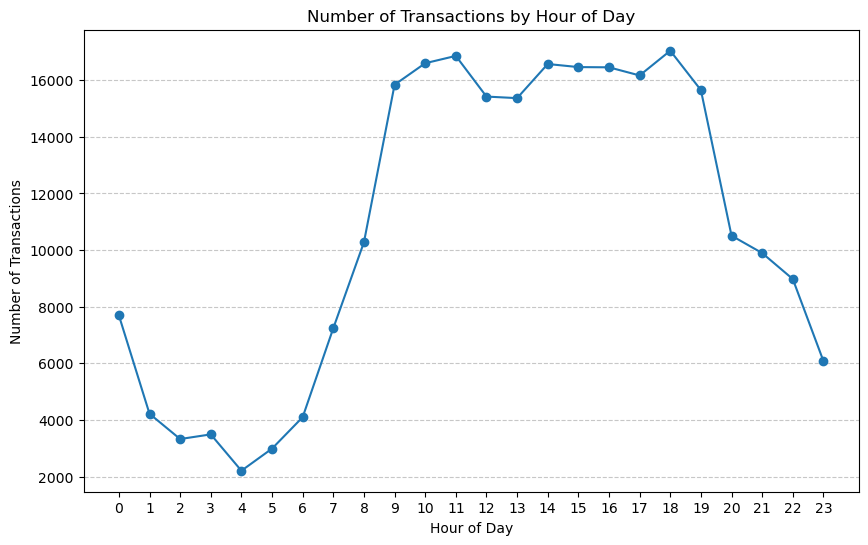

In [50]:
plt.figure(figsize=(10,6))
df['HourOfDay'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()